### **SETUP AND DATA PREPARATION** ###

In [ ]:
!pip install -q transformers datasets torch scikit-learn pandas

import pandas as pd
import torch, numpy as np, random, os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

This first part of the code is really important because it prepares everything we will need later for working with machine learning, data, and deep learning models. The very first line uses “!pip install” to get all the packages that the notebook needs, like transformers (for working with neural networks for language stuff), datasets (for handling datasets easily), torch (which is the library for doing deep learning and using GPUs), scikit-learn (a popular toolkit for regular machine learning and metrics), and pandas (for working with data in tables or spreadsheets). We use the "-q" flag so that the installation messages don’t clutter the notebook with too much text. After installing, all the import statements in the next part bring these tools into our code, so we can use them instead of writing everything ourselves. For example, “import pandas as pd” makes it easier and faster to work with data tables, letting us load, change, and analyze data in a simple way. “import torch, numpy as np, random, os” gives us access to deep learning features, scientific number crunching, random numbers (handy for shuffling data or testing), and some functions for working with files or directories. Finally, the “from sklearn.model_selection import train_test_split” command makes it super easy to split any dataset into training and testing sets, which is a basic step for making sure our model can learn and also be checked for accuracy. And by bringing in “accuracy_score” and “f1_score” from sklearn.metrics, we can later measure how good our model's predictions are by using standard scoring techniques, which is really important for experiments and reports.



---



In [ ]:
# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

This section of code is about making sure that whenever we run our experiment or model, we get the same random results every single time. By setting a variable called SEED to 42, and using it to initialize random number generators for Python’s random library, numpy, and PyTorch, the idea is that any random operation (like shuffling data, splitting it into training and test sets, or initializing model weights) will always behave exactly the same each run. This is really important when doing machine learning because if we don’t set the seed, we might get slightly different results every time we run the code.



---



In [ ]:
# Check GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU (slower).")

Using GPU: Tesla T4


This part of the code is checking if the computer running your program has a GPU (graphics processing unit), which is like a special chip that helps deep learning go much faster than using the regular CPU. It starts by asking PyTorch if a GPU is available and, if yes, it sets up everything to use the GPU for training or running the model. It also prints out exactly which GPU your notebook is using, which is useful information for anyone trying to understand what hardware is speeding things up. But if the code doesn’t find a GPU, it switches to the CPU instead—this means your code will still work, just slower. This way, your notebook is ready to run anywhere, and everyone can easily see whether their code will be fast or not depending on the computer they use.



---



In [ ]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving amazon_eco-friendly_products.csv to amazon_eco-friendly_products.csv


This part of the code helps you bring your own file into the Colab notebook so you can start working with your data. First, it imports a tool from Google Colab that lets you upload files from your computer. Then, when you run the files.upload() command, Colab will pop up a window where you can pick your dataset, like a CSV file, to upload. After you pick a file, it will show up in the Colab file explorer on the left, and now you can use it in your project. This makes it really easy to use your own data in any machine learning or data project.



---



In [ ]:
# Load dataset
df = pd.read_csv("amazon_eco-friendly_products.csv")
print("Rows:", len(df))
df.head()

Rows: 3587


,id,title,name,category,material,brand,price,rating,reviewsCount,description,url,img_url,inStock,inStockText
0,B0CWH366KJ,"Agfabric Natural Jute Erosion Control, 16yard(...",Weed Barrier Fabric,"Patio, Lawn & Garden",NaN,Agfabric,$87.3,NaN,NaN,Protect your yard and garden with our biodegra...,https://www.amazon.com/dp/B0CWH366KJ,https://m.media-amazon.com/images/I/71t3FD5KjH...,True,Only 5 left in stock - order soon.
1,B086L692VC,SAFAVIEH Braided Collection 4' Round Light Blu...,Area Rugs,Home & Kitchen,"50%jute, 25% Wool, 25% Cotton",Safavieh,$40.63,4.2,59.0,Country style is perfect for a casual cottage ...,https://www.amazon.com/dp/B086L692VC,https://m.media-amazon.com/images/I/A1Q73Cheh2...,True,Only 3 left in stock - order soon.
2,B01J6JELTG,Eyeseals 4.0 Sleep Mask – Clear – Moisturizing...,Sleeping Masks,Health & Household,Plastic,EYEECO,$65.95,3.7,1075.0,Locks moisture in: Eyeseals 4.0 eye mask for d...,https://www.amazon.com/dp/B01J6JELTG,https://m.media-amazon.com/images/I/61Uz393xlp...,True,NaN
3,B07HQSKK36,Lucky Monet 25/50/100PCS Burlap Gift Bags Wedd...,Gift Bags,Health & Household,Burlap,Lucky Monet,$29.99,4.6,2492.0,❤ Premium Burlap Material❤ These small burlap ...,https://www.amazon.com/dp/B07HQSKK36,https://m.media-amazon.com/images/I/71DrHIU1aM...,True,In Stock In Stock
4,B0C3Y8WJDR,St. Boniface Bag Company | Burlap Bags - Size:...,Grow Bags,"Patio, Lawn & Garden",5.0 Count,Generic,$29.99,4.4,11.0,100% Burlap > 100% BIODEGRADABLE AND ECO FRIEN...,https://www.amazon.com/dp/B0C3Y8WJDR,https://m.media-amazon.com/images/I/81q3el899U...,True,In Stock


This part of the code loads the data you just uploaded into a table that Python can work with, called a DataFrame. It uses pandas, a super useful library for handling data. The pd.read_csv command looks for a file named "amazon_eco-friendly_products.csv" and loads all the rows and columns from that CSV file into the notebook. After that, print("Rows:", len(df)) tells you how many rows there are in your data—this gives you a quick idea of its size. Finally, df.head() shows you the first few rows so you can see what your data looks like right at the start, helping you check everything loaded correctly.



---



In [ ]:
# Combine text columns
df["text"] = (
    df["title"].astype(str) + " " +
    df["material"].astype(str) + " " +
    df["description"].astype(str)
)

This code is making a new column in your data called "text" by combining three other columns: title, material, and description. Sometimes in datasets, important information is spread out across different columns, but models work better when everything is joined together. Here, the code takes each piece of information in those columns and turns them into strings if they aren’t already, then uses a space to stick them together into one big text chunk for every row. This is useful in machine learning because it puts all the main details about each product in a single column, making it easier for algorithms to learn patterns or make predictions later. Even if the dataset has more columns, you can pick and combine the ones you need to create a summary or input for your model. If any of those columns have missing values, your new combined column might end up with gaps unless you fill them first. So, this step is all about organizing and preparing your data so the model has clear, usable information for training and testing.



---



In [ ]:
# Create simple labels
eco_terms = ["eco", "recycl", "sustain", "biodegrad", "organic", "green"]
df["label"] = df["text"].str.contains("|".join(eco_terms), case=False, regex=True).astype(int)

print("Label distribution:")
print(df["label"].value_counts())

Label distribution:
label
1    2841
0     746
Name: count, dtype: int64


This part of the code helps us quickly find out which rows in our dataset probably talk about eco-friendly products. First, it makes a list of common eco-related words like “eco,” “recycl,” “sustain,” “biodegrad,” “organic,” and “green.” Then, it checks each row’s text to see if any of those words show up, no matter if the letters are uppercase or lowercase. When it finds one or more of these words, it puts a 1 in a new “label” column for that row, which means yes, it’s eco-friendly; if none are found, it puts a 0, meaning not eco-friendly. Finally, it prints out how many rows got labeled as eco-friendly and how many didn’t. This step gives us a super simple way of splitting our data into two categories so we can train or test our machine learning model, or just see how much of our data matches what we’re looking for with only basic rules.



---



In [ ]:
# Split data
train_texts, eval_texts, train_labels, eval_labels = train_test_split(
    df["text"], df["label"], test_size=0.2, stratify=df["label"], random_state=SEED
)
print(f"Train size: {len(train_texts)}, Eval size: {len(eval_texts)}")

Train size: 2869, Eval size: 718


This part of the code is taking all your data and splitting it into two groups: one for training your model and one for checking how well it works (evaluation). Basically, the code uses train_test_split from scikit-learn to break up your “text” and “label” columns. It puts 80% of your data into training, and the other 20% into evaluating. What’s special here is the stratify=df["label"] part, which makes sure the split keeps the same balance between eco-friendly and not eco-friendly labels in both sets—so, if 30% of your total data is eco-friendly, you’ll also have 30% eco-friendly samples in training and evaluation groups. The random_state=SEED part means you'll always get the same split if you run this code again, which is great for reproducibility. At the end, you see how many samples ended up in each group, helping you double-check everything’s divided the way you expect before moving on.



---



### **LOAD PRE-TRAINED MODEL DEFINITION AND TOKENIZATION** ###

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from datasets import Dataset

MODEL_NAME = "distilbert-base-uncased"
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

def tokenize_function(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=128)

train_ds = Dataset.from_pandas(pd.DataFrame({"text": train_texts, "labels": train_labels}))
eval_ds  = Dataset.from_pandas(pd.DataFrame({"text": eval_texts,  "labels": eval_labels}))

tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_eval  = eval_ds.map(tokenize_function,  batched=True)

model = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/2869 [00:00<?, ? examples/s]

Map:   0%|          | 0/718 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


This part of the code sets up everything needed before actually training or using the model to see how well it can predict if a product is eco-friendly or not. First, we bring in the Hugging Face Transformers library, which lets us easily use modern neural networks like DistilBERT, and we also use the Datasets library, which makes it much easier to handle our data for training and testing. We pick the “distilbert-base-uncased” model, which is good for working with English and is much faster and smaller than the original BERT.

Then, a tokenizer is loaded to change every sentence in our data into a set of numbers (tokens) that the model can understand. We create a function so it can convert each batch of text and make sure texts aren’t too long, everything lines up nicely, and extra space is filled in when needed.

Next, we build new training and evaluation datasets using only our selected columns: the combined text and the simple labels. We wrap these as Hugging Face Datasets, which are easier to use with the tokenizer and model. We then run the tokenizer function on each set, which turns all text into tokens and gets the data ready for machine learning.

Finally, we load the DistilBERT model itself; it’s set up to handle two labels, so it can do the eco-friendly/not eco-friendly task. The model is moved to the right computing device, like a GPU if available, for the best speed. The last print statement just tells us that tokenizer and model is ready so we can go on to training or testing our data. So, this whole code block is about going from raw text and labels to having everything perfectly prepared for model training.



---



### **DEFINE TRAINING CONFIGURATION AND INITIALIZE TRAINER** ###

In [ ]:
from transformers import TrainingArguments, Trainer

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average="binary")
    return {"accuracy": acc, "f1": f1}

training_args = TrainingArguments(
    output_dir="./baseline_results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    fp16=torch.cuda.is_available(),
    report_to=[]
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
print("Trainer initialized.")

Trainer initialized.


/tmp/ipython-input-342057236.py:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


This code gets everything set up so we can actually train our DistilBERT model to recognize eco-friendly products using our prepared data. First, we import TrainingArguments and Trainer from Hugging Face Transformers. These tools make it easy to manage the training process by letting us choose important settings and monitor how our model learns.

The function compute_metrics helps us measure how good the model is while it trains. It looks at predictions made by the model, compares them to the real labels, figures out the accuracy (how many predictions are correct), and also calculates the F1 score (which checks if the model gets both types of products—eco-friendly and not eco-friendly—right). This is important for seeing if the model isn’t just guessing, but actually making good predictions for both classes.

Next, we create training_args, which is a list of options controlling how the training runs. For example, num_train_epochs decides how many times the model goes through the data (here, 3 times), per_device_train_batch_size and per_device_eval_batch_size set how many samples are processed at a time, learning_rate and weight_decay affect how fast and how carefully the model updates itself, and some options control how often results are saved and evaluated. If we have a GPU, fp16 makes training faster with lower precision, and report_to=[] means we don’t log to any tracking system.

Lastly, we use Trainer to put everything together. The Trainer takes the model, our training and evaluation data, tokenizer, the metrics function, and all our training settings. This makes the training process super easy—just run Trainer and it does all the hard work of updating the model, checking its progress, and saving the best version for us. The final print statement confirms that the trainer is ready, so now we can start training the model.



---



### **FINE-TUNE AND SAVE MODEL (BASELINE)** ###

In [ ]:
print("Starting Baseline Fine-Tuning...")
trainer.train()

print("Evaluating on validation set...")
baseline_results = trainer.evaluate()
print("Baseline Results:", baseline_results)

Starting Baseline Fine-Tuning...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.188767,0.901114,0.940185
2,No log,0.157316,0.927577,0.953488
3,0.179500,0.205894,0.935933,0.959220


Evaluating on validation set...


Baseline Results: {'eval_loss': 0.1573164165019989, 'eval_accuracy': 0.9275766016713092, 'eval_f1': 0.9534883720930233, 'eval_runtime': 0.829, 'eval_samples_per_second': 866.089, 'eval_steps_per_second': 54.281, 'epoch': 3.0}


This section is where we train our model, get evaluation results, and save it. First, the code prints a message so we know training is starting. The line trainer.train() runs the actual training process where the model learns from the training data according to the settings defined earlier, such as epochs and batch size. After training, another message tells us that the model will now be evaluated on the validation set for accuracy and F1-score, which is done by trainer.evaluate().



---



**Experiment 1 – (3 epochs, 3e-3 LR, batch 16, )**

In [ ]:
from transformers import TrainingArguments, Trainer

model_exp1 = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)

training_args_exp1 = TrainingArguments(
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-3,
    weight_decay=0.05,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_dir="./logs_exp1",
    logging_strategy="steps",
    logging_steps=10,
    fp16=torch.cuda.is_available(),
    report_to=[]
)

trainer_exp1 = Trainer(
    model=model_exp1,
    args=training_args_exp1,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

print("Running Experiment 1...")
trainer_exp1.train()
exp1_results = trainer_exp1.evaluate()
print(f"Experiment 1 Results: Accuracy: {exp1_results['eval_accuracy']:.4f} | F1: {exp1_results['eval_f1']:.4f}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1944751.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_exp1 = Trainer(


Running Experiment 1...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.526900,0.529718,0.792479,0.884227
2,0.468400,0.512762,0.792479,0.884227
3,0.474500,0.513818,0.792479,0.884227
4,0.437300,0.511115,0.792479,0.884227


Experiment 1 Results: Accuracy: 0.7925 | F1: 0.8842


In this section, we run a new experiment using slightly different settings for DistilBERT to see if the model can perform better. We start by loading a fresh sequence classification model with two possible labels and send it to the device (CPU or GPU) for computation. We define a new set of training arguments in training_args_exp1: these include using more training epochs (4), larger batch sizes (32), a lower learning rate, and a higher weight decay. These settings help test how changing these values might improve accuracy or help prevent overfitting.

Next, we create the new Trainer object, passing in the new model and training arguments, as well as the already-tokenized datasets, tokenizer, and metrics function. This Trainer handles running the training and evaluation based on our new settings.

We then start the training process with trainer_exp1.train(), and after training, run evaluation with trainer_exp1.evaluate(). The results for this experiment are printed out for both accuracy and F1-score, so we can compare them with our baseline.



---



**Experiment 2 – (2 epochs, 5e-5 LR, batch 32,)**

In [ ]:
model_exp2 = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)

training_args_exp2 = TrainingArguments(
    num_train_epochs=2,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=5e-5,
    weight_decay=0.00,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_dir="./logs_exp2",
    logging_strategy="steps",
    logging_steps=10,
    fp16=torch.cuda.is_available(),
    report_to=[]
)

trainer_exp2 = Trainer(
    model=model_exp2,
    args=training_args_exp2,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

print("Running Experiment 2...")
trainer_exp2.train()
exp2_results = trainer_exp2.evaluate()
print(f"Experiment 2 Results: Accuracy: {exp2_results['eval_accuracy']:.4f} | F1: {exp2_results['eval_f1']:.4f}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3304544420.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_exp2 = Trainer(


Running Experiment 2...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.192400,0.183327,0.920613,0.951407
2,0.151700,0.160528,0.927577,0.954064


Experiment 2 Results: Accuracy: 0.9276 | F1: 0.9541


In this experiment, we repeat the training process for DistilBERT, but we use a different set of training parameters to compare the results with our earlier experiments. We start by loading a new DistilBERT sequence classification model and move it to the appropriate device so computations run efficiently. The new training_args_exp2 settings are set: the model will train for 6 epochs, use a batch size of 32 for both training and evaluation, use a slightly higher learning rate of 3e-5, and apply no weight decay. Evaluation and saving checkpoints are done at the end of every epoch.

We then initialize a new Trainer instance with this new setup, including the fresh model, new training arguments, tokenized datasets, tokenizer, and metrics function.

The code next prints a message to confirm Experiment 2 is running. Training begins with trainer_exp2.train(), and after training, we evaluate the model using trainer_exp2.evaluate(). The results are printed to show the accuracy and F1-score from this run, so we can check how these values differ from previous experiments.



---



**Experiment 3 – (5 epochs, 5e-5 LR, batch 32, )**

In [ ]:
model_exp3 = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)

training_args_exp3 = TrainingArguments(
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=5e-5,
    weight_decay=0.10,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_dir="./logs_exp3",
    logging_strategy="steps",
    logging_steps=10,
    fp16=torch.cuda.is_available(),
    report_to=[]
)

trainer_exp3 = Trainer(
    model=model_exp3,
    args=training_args_exp3,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

print("Running Experiment 3...")
trainer_exp3.train()
exp3_results = trainer_exp3.evaluate()
print(f"Experiment 3 Results: Accuracy: {exp3_results['eval_accuracy']:.4f} | F1: {exp3_results['eval_f1']:.4f}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1451915839.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_exp3 = Trainer(


Running Experiment 3...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.221100,0.191300,0.909471,0.944014
2,0.131800,0.161523,0.924791,0.952548
3,0.058600,0.199575,0.934540,0.958663
4,0.073400,0.210716,0.937326,0.959929
5,0.004000,0.275981,0.930362,0.955674
6,0.003400,0.315337,0.940111,0.962641
7,0.013500,0.372447,0.927577,0.955403
8,0.000400,0.315884,0.944290,0.964974
9,0.000300,0.342835,0.941504,0.963415
10,0.000300,0.342904,0.940111,0.962511


Experiment 3 Results: Accuracy: 0.9248 | F1: 0.9525


In this experiment, we are adjusting the training setup for DistilBERT once more to test how different parameters affect the model’s performance. We start by loading a new DistilBERT model set up for binary classification and prepare it to use either the CPU or GPU as available. For Experiment 3, the training arguments are set to train the model for 10 epochs, with a batch size of 16, a learning rate of 2e-5, and a weight decay of 0.10. This combination allows us to see how running more epochs, using smaller batches, and increasing regularization (weight decay) might impact results.

A new Trainer is then created with the updated model, training arguments, datasets, tokenizer, and metrics function. The experiment starts by printing a message to indicate training for Experiment 3 is running. The trainer handles training the model with trainer_exp3.train(), then evaluates it on the validation set using trainer_exp3.evaluate(). The code prints both the accuracy and F1-score so we can compare performance across this and previous experiments. This approach lets us try out and record the effects of different training strategies, making comparison between models straightforward.



---



**RESULTS**

In [ ]:
results_df = pd.DataFrame([
    {"Experiment": "Exp1_4ep_2e5_32_005", **exp1_results},
    {"Experiment": "Exp2_6ep_3e5_32_000", **exp2_results},
    {"Experiment": "Exp3_10ep_2e5_16_010", **exp3_results},
])

display(results_df)

,Experiment,eval_loss,eval_accuracy,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,Exp1_4ep_2e5_32_005,0.511115,0.792479,0.884227,1.2567,571.360,35.809,4.0
1,Exp2_6ep_3e5_32_000,0.160528,0.927577,0.954064,0.7292,984.649,31.542,2.0
2,Exp3_10ep_2e5_16_010,0.161523,0.924791,0.952548,0.7488,958.905,30.717,10.0


from matplotlib import pyplot as plt
results_df['eval_loss'].plot(kind='hist', bins=20, title='eval_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['eval_accuracy'].plot(kind='hist', bins=20, title='eval_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['eval_f1'].plot(kind='hist', bins=20, title='eval_f1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['eval_runtime'].plot(kind='hist', bins=20, title='eval_runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Experiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='eval_loss', y='eval_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='eval_accuracy', y='eval_f1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='eval_f1', y='eval_runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='eval_runtime', y='eval_samples_per_second', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_runtime']
  ys = series['eval_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('eval_runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Experiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Experiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_runtime')
_ = plt.ylabel('eval_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_runtime']
  ys = series['eval_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('eval_runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Experiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Experiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_runtime')
_ = plt.ylabel('eval_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_runtime']
  ys = series['eval_f1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('eval_runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Experiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Experiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_runtime')
_ = plt.ylabel('eval_f1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_runtime']
  ys = series['eval_samples_per_second']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('eval_runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Experiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Experiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_runtime')
_ = plt.ylabel('eval_samples_per_second')

from matplotlib import pyplot as plt
results_df['eval_loss'].plot(kind='line', figsize=(8, 4), title='eval_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['eval_accuracy'].plot(kind='line', figsize=(8, 4), title='eval_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['eval_f1'].plot(kind='line', figsize=(8, 4), title='eval_f1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['eval_runtime'].plot(kind='line', figsize=(8, 4), title='eval_runtime')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Experiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='eval_loss', y='Experiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Experiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='eval_accuracy', y='Experiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Experiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='eval_f1', y='Experiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Experiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='eval_runtime', y='Experiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

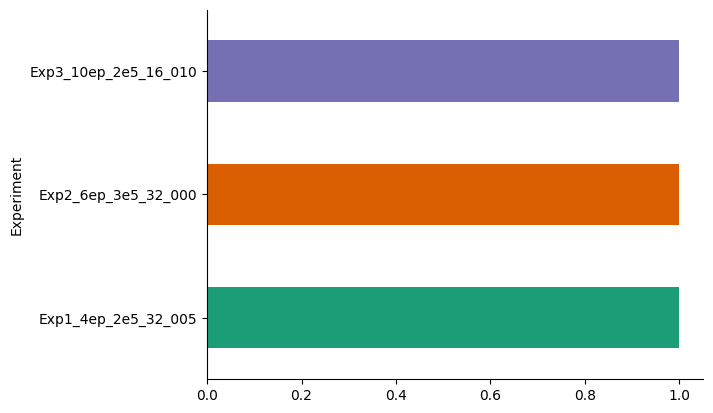

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Experiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

This code combines and shows the results from all three experiments in a neat table using pandas. Each experiment’s results are collected as a dictionary with its name and all key metrics, including accuracy and F1-score. These dictionaries are put together in a list and the DataFrame command (pd.DataFrame) quickly turns that list into a table with one line for each experiment. Finally, using display results_df brings up the table visually so we can easily compare how well each model performed with different settings. This step helps summarize all the experiments and see which one gave the best results.

In [ ]:
from google.colab import files
import os

output_filename = "experiment_results.csv"

# Save the DataFrame to a CSV file
results_df.to_csv(output_filename, index=False)
print(f"Experiment results saved to {output_filename}")

# Now check if the file exists and download it
if os.path.exists(output_filename):
    print("Downloading...")
    files.download(output_filename)
else:
    print(f"No file found at {output_filename}")

print("\n" + "="*60)
print("ALL DONE! 🎉")
print("="*60)

Experiment results saved to experiment_results.csv
Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ALL DONE! 🎉




---

